In [11]:
import numpy as np
from scipy.spatial import KDTree
import matplotlib.pyplot as plt

In [12]:
def F_kernel(q): 
    if q>=0 and q<1:
        return 1-1.5*q**2+0.75*q**3
    if q>=1 and q<2:
        return 0.25*(2-q)**3
    if q>=2:
        return 0

def W_1order(dist, h):
    q = dist/h
    C = 2./3.
    return C*F_kernel(q)/h**1

def W_3order(dist, h):
    q = dist/h
    C = 1./np.pi
    return C*F_kernel(q)/h**1

def Dist(a, b):
    if len(a)==3:
        return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2 + (a[2]-b[2])**2)
    if len(a)==2:
        return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
    if len(a)==1:
        return np.sqrt((a-b)**2)

def EoS(rho, u, gamma = 5./3.):
    return (gamma-1.)*rho*u
    

In [13]:
# 1
nmax = 100
particles = np.zeros((nmax, 8))
#index
X1 = 0      # position x1
VEL1 = 1    # velocity in x1 direction 
MAS = 2     # mass 
LEN = 3     # smoothing length
DEN = 4     # density
ENE = 5     # internal energy (u) 
PRE = 6     # pressure 
SPE = 7     # sound speed

In [14]:
# 2
#index
X1 = 0      # position x1
VEL1 = 1    # velocity in x1 direction 
MAS = 2     # mass 
LEN = 3     # smoothing length
DEN = 4     # density
ENE = 5     # internal energy (u) 
PRE = 6     # pressure 
SPE = 7     # sound speed

def setup(n, xmin, xmax, rho0, cs):
    particles = np.zeros((n, 8))
    dx = (xmax - xmin)/n
    m0 = rho0*dx
    for i in range(n):
        particles[i, X1] = xmin + 0.5*dx + i*dx
        particles[i, MAS] = m0 
        particles[i, VEL1] = 1e-4*cs*np.sin(4.*np.pi*particles[i, X1])
        particles[i, LEN] = 1.2*dx
    return particles
        
n = 100
xmin = 0
xmax = 1.
rho0 = 1.0
cs = 0.1


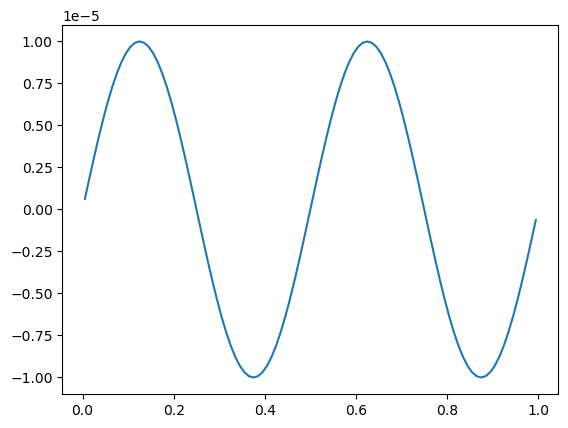

In [15]:
# 3
particles = setup(n, xmin, xmax, rho0, cs)
plt.plot(particles[:, X1], particles[:, VEL1])
plt.show()


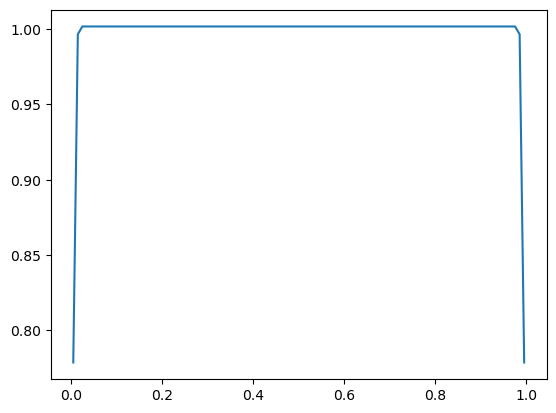

In [16]:
#4

def F_kernel(q): 
    if q>=0 and q<1:
        return 1-1.5*q**2+0.75*q**3
    if q>=1 and q<2:
        return 0.25*(2-q)**3
    if q>=2:
        return 0

def F_kernel_p(q): 
    if q>=0 and q<1:
        return -3.*q + 3*0.75*q**2
    if q>=1 and q<2:
        return 0.75*(2-q)**2*(-1)
    if q>=2:
        return 0
    
def W_1order(dist, h):
    q = dist/h
    C = 2./3.
    return C*F_kernel(q)/h**1

def W_1order_p(ra, rb, h):
    q = abs(ra-rb)/h
    C = 2./3.
    if ra == rb: 
        rhat = 0
    else:
        rhat = (ra-rb)/abs(ra-rb)
    return rhat*C*F_kernel_p(q)/h**2

def get_density(particles):
    n = len(particles)
    for i in range(n):
        particles[i, DEN] = 0
        for j in range(n):
            particles[i, DEN] += particles[j, MAS]*W_1order(abs(particles[i,X1]-particles[j,X1]), particles[i,LEN])
    return particles

particles = get_density(particles)

plt.plot(particles[:, X1], particles[:, DEN])
plt.show()

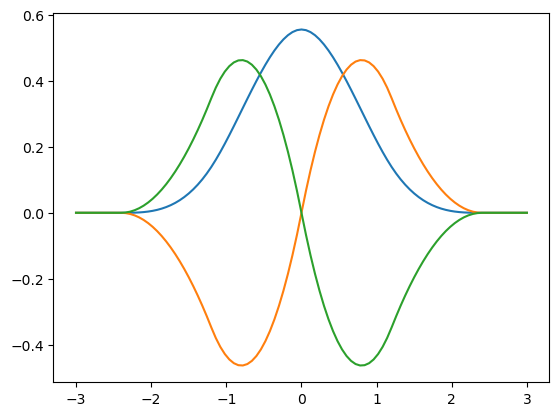

In [17]:
rlist = np.linspace(-3, 3, 101)
qlist = abs(0-rlist)
fq = np.copy(qlist)
fqp = np.copy(qlist)
for i in range(len(qlist)):
    fq[i] = W_1order(qlist[i], 1.2)
    fqp[i] = W_1order_p(0, rlist[i], 1.2)
    
    
def diff(y, x):
    n = len(y)
    if type(y[0])==np.float64:
        diffy = np.zeros(n, dtype = "float64")
    else:
        diffy = np.zeros(n, dtype = "complex128")
    for k in range(2, n-2):
        diffy[k] = (y[k-2]-8*y[k-1]+8*y[k+1]-y[k+2])/((x[k]-x[k-1])*12)
    k=n
    diffy[1-1] = (-25*y[1-1]+48*y[2-1]-36*y[3-1]+16*y[4-1]-3*y[5-1])/(12*(x[2-1]-x[1-1]))
    diffy[2-1] = (-3*y[1-1]-10*y[2-1]+18*y[3-1]-6*y[4-1]+y[5-1])/(12*(x[2-1]-x[1-1]))
    diffy[k-1-1] = (-y[k-4-1]+6*y[k-3-1]-18*y[k-2-1]+10*y[k-1-1]+3*y[k-1])/(12*(x[2-1]-x[1-1]))
    diffy[k-1] = (3*y[k-4-1]-16*y[k-3-1]+36*y[k-2-1]-48*y[k-1-1]+25*y[k-1])/(12*(x[2-1]-x[1-1]))
    return diffy

fqp2 = diff(fq, rlist)
plt.plot(rlist, fq)
plt.plot(rlist, fqp)
plt.plot(rlist, fqp2)
plt.show()

100


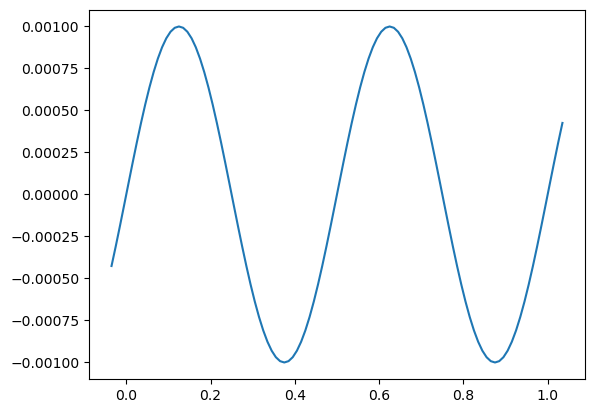

In [18]:
# 5
#index
X1 = 0      # position x1
VEL1 = 1    # velocity in x1 direction 
MAS = 2     # mass 
LEN = 3     # smoothing length
DEN = 4     # density
ENE = 5     # internal energy (u) 
PRE = 6     # pressure 
SPE = 7     # sound speed
ACC1 = 8    # acceleration 
def setup(n, xmin, xmax, rho0, cs, nghost = 0):   # new setup that can include ghost particles.
    particles = np.zeros((n+2*nghost, 9))
    dx = (xmax - xmin)/n
    m0 = rho0*dx
    for i in range(nghost, n+nghost):
        particles[i, X1] = xmin + 0.5*dx + (i-nghost)*dx
        particles[i, MAS] = m0 
        particles[i, VEL1] = 1e-2*cs*np.sin(4.*np.pi*particles[i, X1])
        particles[i, LEN] = 1.2*dx
        particles[i, SPE] = cs
    return particles

def set_ghosts(particles, nghost, L):
    for i in range(nghost):
        particles[i] = particles[-2*nghost+i]
        particles[i, X1] = particles[i, X1] - L
        particles[-nghost+i] = particles[nghost+i]
        particles[-nghost+i, X1] = particles[-nghost+i, X1] + L
    return particles

n = 100
xmin = 0
xmax = 1.
L = xmax - xmin
rho0 = 1.0
cs = 0.1
nghost = 4
particles = setup(n, xmin, xmax, rho0, cs, nghost)
particles = set_ghosts(particles, nghost, L)

particles = get_density(particles)
act_par = particles[nghost:-nghost]
print(len(act_par))
# plt.plot(act_par[:, X1], act_par[:, DEN])
plt.plot(particles[:, X1], particles[:, VEL1])
# plt.ylim(0,2)
plt.show()

In [19]:
# 6
def eos_iso(rho, cs = 1.0):
    p = cs**2*rho
    return p

def get_pressure(particles, eos=eos_iso):
    n = len(particles)
    for i in range(n):
        particles[i, PRE] = eos(particles[i, DEN], particles[i, SPE])
    return particles

In [20]:
# 7

def get_accel(particles):
    qa = 0
    qb = 0
    mass = particles[:,MAS]
    p = particles[:,PRE]
    rho = particles[:,DEN]
    r = particles[:,X1]
    h = particles[:,LEN]
    for a in range(len(particles)):
        acc = 0
        for b in range(len(particles)):
            acc += - mass[b]*(  ((p[a]+qa)/rho[a]**2)*W_1order_p(r[a], r[b], h[a]) 
                              + ((p[b]+qb)/rho[b]**2)*W_1order_p(r[a], r[b], h[b]) )
        particles[a, ACC1] = acc
    return particles
    
def derivs(particles, nghost):
    particles = set_ghosts(particles, nghost, L)
    particles = get_density(particles)
    particles = get_pressure(particles)
    particles = get_accel(particles)
    return particles

In [21]:
# 8 leapfrog 
def integral(particles, nghost, dt):
    r = np.copy(particles[:,X1])
    vel = np.copy(particles[:,VEL1])
    vhalf = np.copy(vel)
    for a in range(nghost, len(particles)-nghost):
        acc = particles[a, ACC1]
        particles[a, X1] = r[a] + dt*vel[a] + 0.5*dt**2*acc
        vhalf[a] = vel[a] + 0.5*dt*acc
    particles = derivs(particles, nghost)
    for a in range(nghost, len(particles)-nghost):
        particles[a, VEL1] = vhalf[a] + 0.5*dt*particles[a, ACC1]
    return particles

def sim(particles, nghost, t0, tmax, dt):
    t = t0
    while t<tmax:
        particles = integral(particles, nghost, dt)
        particles = derivs(particles, nghost)
        t = t + dt
    return particles

    

In [22]:
# 8 rk4
def f(t, y, acc):
    f = np.zeros(2)
    f[0] = y[1]
    f[1] = acc
    return f

def rk4(t, dt, y, acc, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1 = dt*f(t, y, acc)
    k2 = dt*f(t+0.5*dt, y+0.5*k1, acc)
    k3 = dt*f(t+0.5*dt, y+0.5*k2, acc) 
    k4 = dt*f(t+dt, y+k3, acc) 
    y = y + (1./6.)*(k1 + 2.*k2 + 2.*k3 + k4)
    return y

def integral_rk4(particles, nghost, dt):
    r = np.copy(particles[:,X1])
    vel = np.copy(particles[:,VEL1])
    acc = np.copy(particles[:,ACC1])
    for a in range(nghost, len(particles)-nghost):
        y = np.array([r[a], vel[a]])
        y = rk4(t, dt, y, acc[a], 2)
        particles[a, X1] = y[0]
        particles[a, VEL1] = y[1]
    return particles

def sim_rk4(particles, nghost, t0, tmax, dt):
    t = t0
    while t<tmax:
        particles = integral(particles, nghost, dt)
        particles = derivs(particles, nghost)
        t = t + dt
    return particles

In [23]:
def get_kinetic_energy(particles, nghost):
    kn = 0
    for i in range(nghost, len(particles)-nghost):
        kn += 0.5*particles[i,MAS]*particles[i,VEL1]**2
    return kn

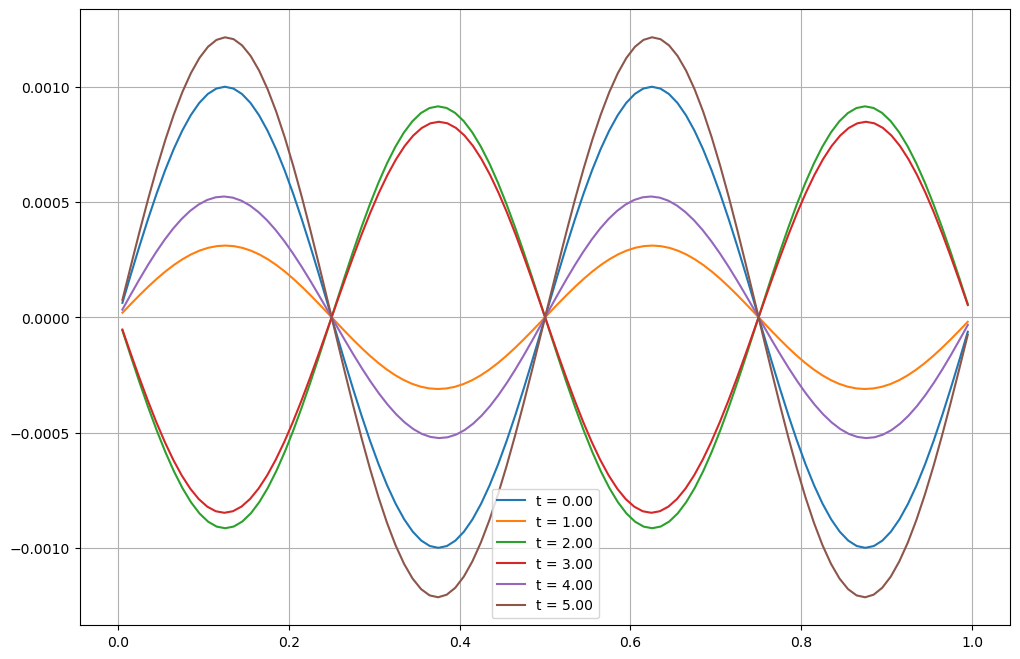

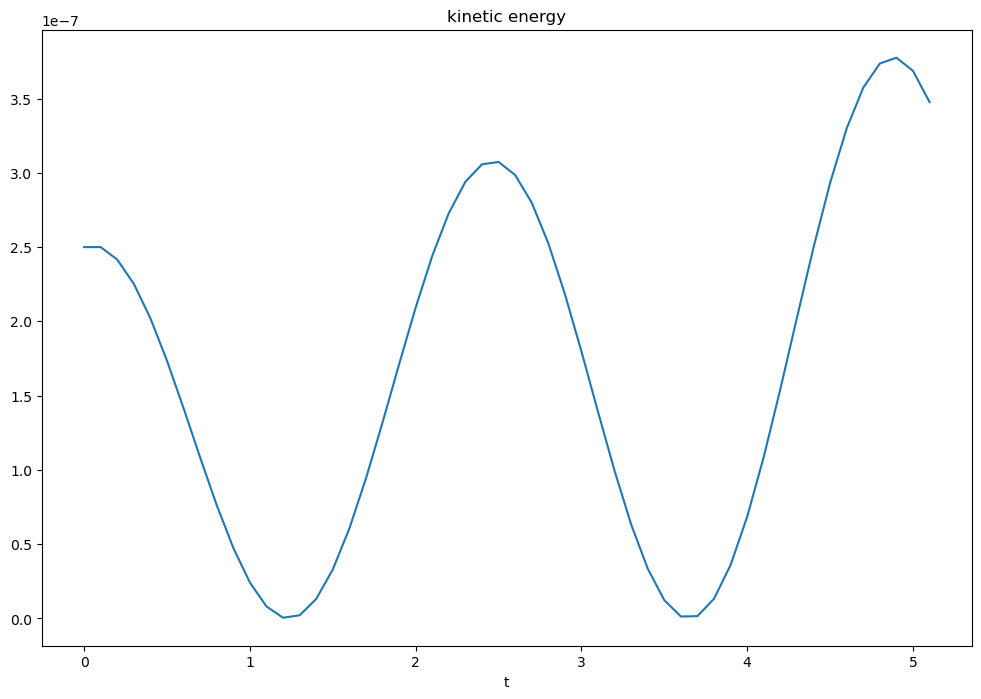

In [24]:
n = 100
xmin = 0
xmax = 1.
L = xmax - xmin
rho0 = 1.0
cs = 0.1
nghost = 10
particles = setup(n, xmin, xmax, rho0, cs, nghost)
particles = derivs(particles, nghost)

t0 = 0
tmax = 5
dt = 0.1
toutput = 0.
dtoutput = 1.

t = t0
plt.figure(figsize = (12,8))
act_par = particles[nghost:-nghost]
plt.plot(act_par[:, X1], act_par[:, VEL1], label = "t = "+ format(t, ".2f"))
toutput += dtoutput

t_list = [t0,]
KE_list = [get_kinetic_energy(particles, nghost),]

while t<tmax:
    particles = integral_rk4(particles, nghost, dt)
    particles = derivs(particles, nghost)
    t = t + dt
    t_list.append(t)
    KE_list.append(get_kinetic_energy(particles, nghost))
    
    if abs(t-toutput)<0.5*dt:
        print("t=", format(t, ".2f"), end="\r")
        act_par = particles[nghost:-nghost]
        plt.plot(act_par[:, X1], act_par[:, VEL1], label = "t = "+ format(t, ".2f"))
        toutput += dtoutput
    
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize = (12,8))
plt.plot(t_list, KE_list)
plt.title("kinetic energy")
plt.xlabel("t")
plt.show()

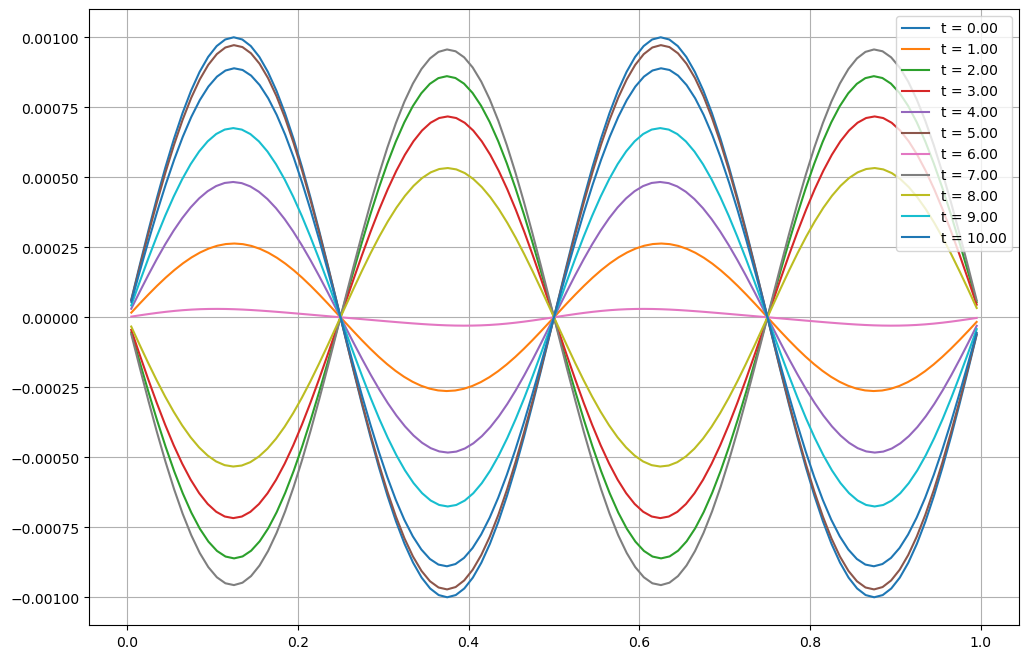

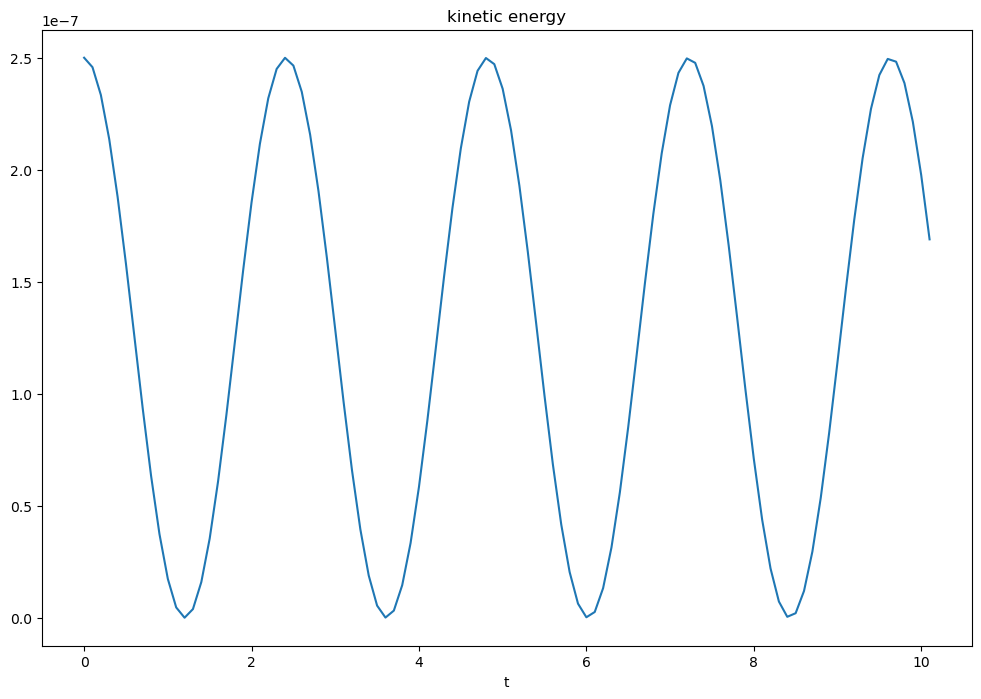

In [18]:
# 8 & 9

n = 100
xmin = 0
xmax = 1.
L = xmax - xmin
rho0 = 1.0
cs = 0.1
nghost = 10
particles = setup(n, xmin, xmax, rho0, cs, nghost)
particles = derivs(particles, nghost)

t0 = 0
tmax = 10
dt = 0.1
toutput = 0.
dtoutput = 1.

t = t0

plt.figure(figsize = (12,8))
act_par = particles[nghost:-nghost]
plt.plot(act_par[:, X1], act_par[:, VEL1], label = "t = "+ format(t, ".2f"))
toutput += dtoutput

t_list = [t0,]
KE_list = [get_kinetic_energy(particles, nghost),]

while t<tmax:
    particles = integral(particles, nghost, dt)
    particles = derivs(particles, nghost)
    t = t + dt
    t_list.append(t)
    KE_list.append(get_kinetic_energy(particles, nghost))
    
    if abs(t-toutput)<0.5*dt:
        print("t=", format(t, ".2f"), end="\r")
        act_par = particles[nghost:-nghost]
        plt.plot(act_par[:, X1], act_par[:, VEL1], label = "t = "+ format(t, ".2f"))
        toutput += dtoutput
    
plt.grid()
plt.legend()
plt.show()

# plot kinetic energy of the particles
plt.figure(figsize = (12,8))
plt.plot(t_list, KE_list)
plt.title("kinetic energy")
plt.xlabel("t")
plt.show()

In [19]:
# linear calculation

Equations (isothermal):
\begin{equation}
\begin{aligned}
\frac{\partial\rho}{\partial t} + \frac{\partial{\rho v}}{\partial{r}} &= 0\,, \\
\frac{\partial{v}}{\partial t} + v\frac{\partial v}{\partial r} + \frac1\rho\frac{\partial{p}}{\partial{r}} &= 0\,.
\end{aligned}
\end{equation}
Linearized with $v_0=0$, $p=c_s^2\rho$,
\begin{equation}
\begin{aligned}
\frac{\partial\delta\rho}{\partial t} + \rho_0\frac{\partial{\delta v}}{\partial{r}} &= 0\,, \\
\frac{\partial\delta{v}}{\partial t} + \frac{c_s^2}{\rho_0}\frac{\partial\delta{\rho}}{\partial{r}} &= 0\,.
\end{aligned}
\end{equation}
Dispersion relation
\begin{equation}
-\omega^2 + k^2c_s^2 = 0 \,,
\end{equation}
where $k=4\pi$, $c_s = 0.1$ (depended on setup.)
Then $\omega = 0.4\pi$, $T = 5$. And $T_{KE} = \frac{T}{2}=2.5$.

In [20]:
# 10 smoothing
def smoothing(particles):
    hfact = 1.2
    for i in range(len(particles)):
        particles[i, LEN] = hfact*(particles[i,MAS]/particles[i,DEN])
    return particles

# new derivs including smoothing
def derivs(particles, nghost):
    n_smooth = 3
    particles = set_ghosts(particles, nghost, L)
    particles = get_density(particles)
    for i in range(n_smooth):
        particles = smoothing(particles)
        particles = get_density(particles)
    particles = get_pressure(particles)
    particles = get_accel(particles)
    return particles

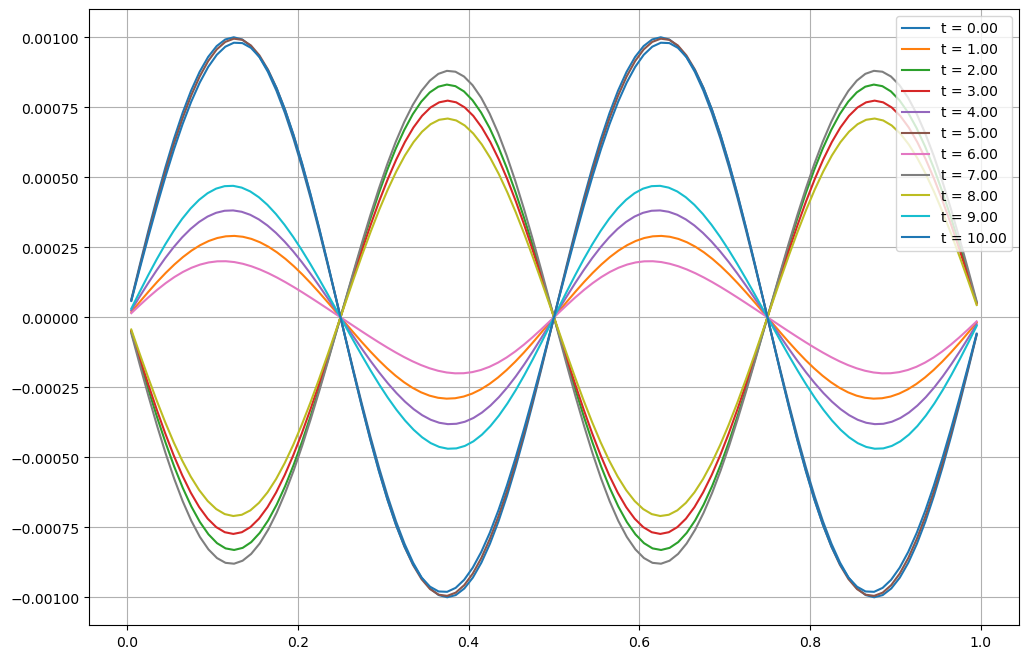

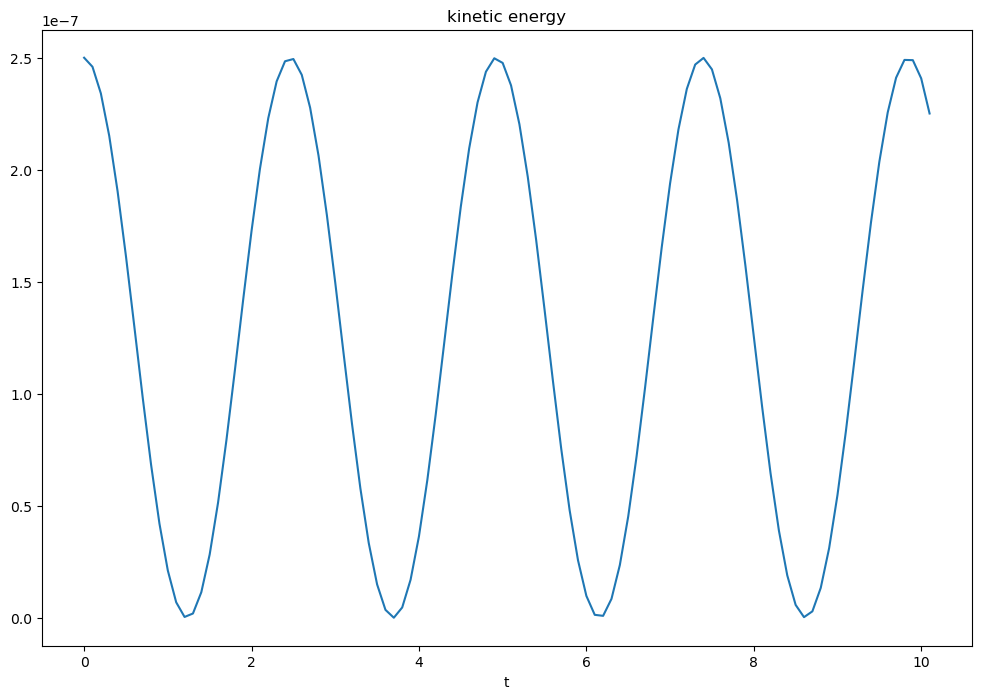

In [21]:
n = 100
xmin = 0
xmax = 1.
L = xmax - xmin
rho0 = 1.0
cs = 0.1
nghost = 10
particles = setup(n, xmin, xmax, rho0, cs, nghost)
particles = derivs(particles, nghost)

t0 = 0
tmax = 10
dt = 0.1
toutput = 0.
dtoutput = 1.

t = t0

drawindex = VEL1

plt.figure(figsize = (12,8))
act_par = particles[nghost:-nghost]
plt.plot(act_par[:, X1], act_par[:, drawindex], label = "t = "+ format(t, ".2f"))
toutput += dtoutput

t_list = [t0,]
KE_list = [get_kinetic_energy(particles, nghost),]

while t<tmax:
    particles = integral(particles, nghost, dt)
    particles = derivs(particles, nghost)
    t = t + dt
    t_list.append(t)
    KE_list.append(get_kinetic_energy(particles, nghost))
    
    if abs(t-toutput)<0.5*dt:
        print("t=", format(t, ".2f"), end="\r")
        act_par = particles[nghost:-nghost]
        plt.plot(act_par[:, X1], act_par[:, drawindex], label = "t = "+ format(t, ".2f"))
        toutput += dtoutput
    
plt.grid()
plt.legend()
plt.show()

# plot kinetic energy of the particles
plt.figure(figsize = (12,8))
plt.plot(t_list, KE_list)
plt.title("kinetic energy")
plt.xlabel("t")
plt.show()

In [30]:
# 12 

def get_visco(para, parb, alpha = 1, beta = 2):
    vab = para[VEL1] - parb[VEL1]
    if para[X1] == parb[X1]: 
        rab_hat = 0
    else:
        rab_hat = (para[X1] - parb[X1])/abs(para[X1] - parb[X1])
    vdotr = vab*rab_hat
    if vdotr < 0:
        nu_siga = alpha * para[SPE] - beta*vdotr
        nu_sigb = alpha * parb[SPE] - beta*vdotr
        qa = -0.5*para[DEN]*nu_siga*vdotr
        qb = -0.5*parb[DEN]*nu_sigb*vdotr
    else:
        qa = 0
        qb = 0
    return qa, qb

def get_accel(particles):
    mass = particles[:,MAS]
    p = particles[:,PRE]
    rho = particles[:,DEN]
    r = particles[:,X1]
    h = particles[:,LEN]
    for a in range(len(particles)):
        acc = 0
        for b in range(len(particles)):
            qa, qb = get_visco(particles[a], particles[b])
            acc += - mass[b]*(  ((p[a]+qa)/rho[a]**2)*W_1order_p(r[a], r[b], h[a]) 
                              + ((p[b]+qb)/rho[b]**2)*W_1order_p(r[a], r[b], h[b]) )
        particles[a, ACC1] = acc
    return particles
    
# new derivs including smoothing
def derivs(particles, nghost):
    n_smooth = 3
    particles = set_ghosts(particles, nghost, L)
    particles = get_density(particles)
    for i in range(n_smooth):
        particles = smoothing(particles)
        particles = get_density(particles)
    particles = get_pressure(particles)
    particles = get_accel(particles)
    return particles

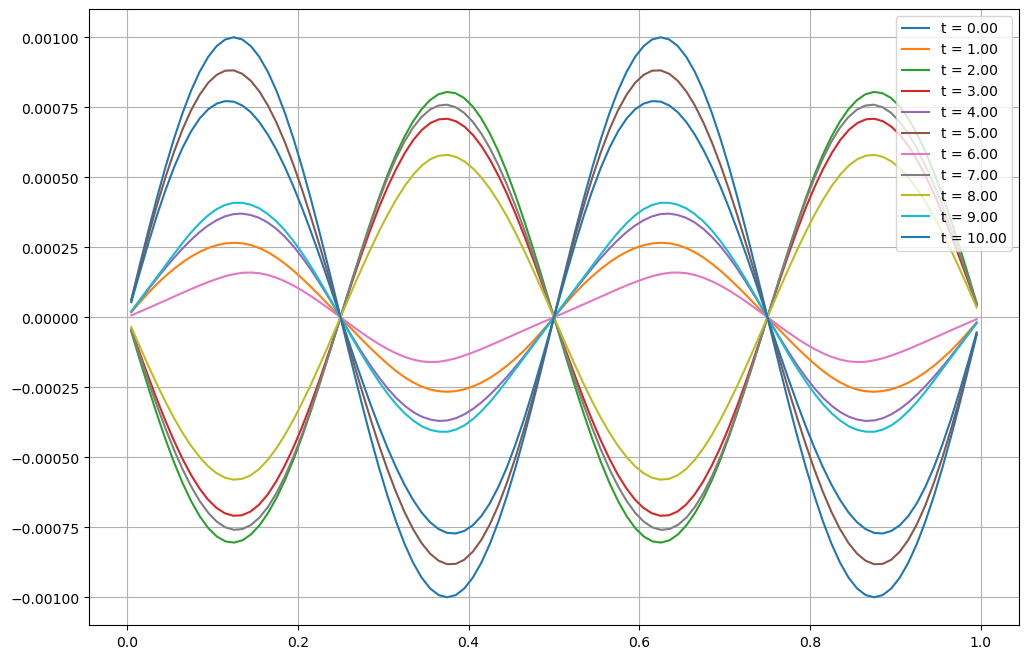

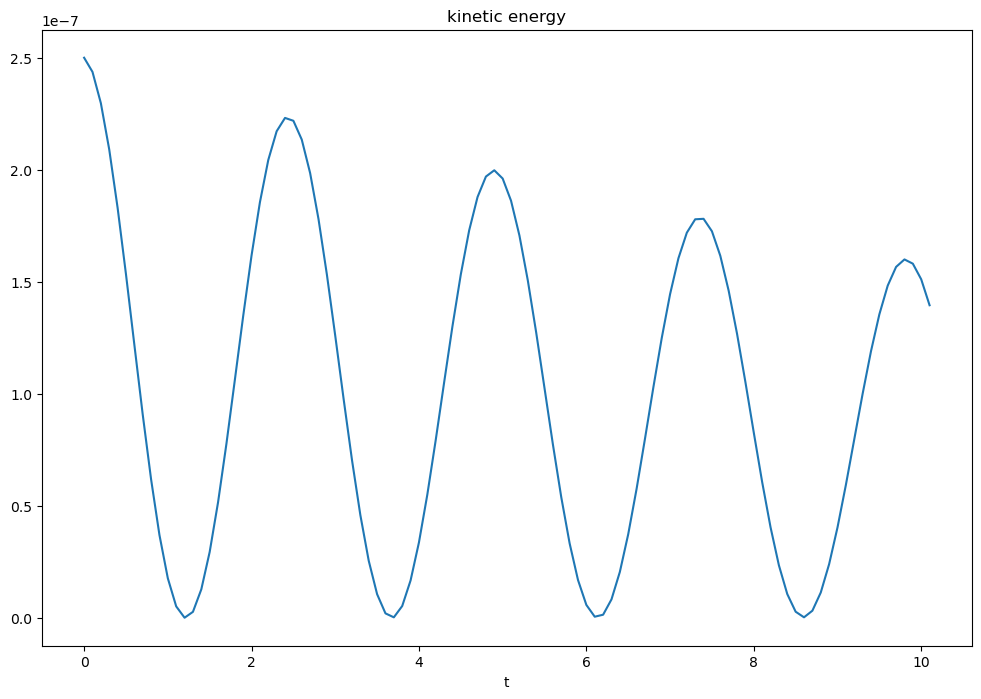

In [31]:
n = 100
xmin = 0
xmax = 1.
L = xmax - xmin
rho0 = 1.0
cs = 0.1
nghost = 10
particles = setup(n, xmin, xmax, rho0, cs, nghost)
particles = derivs(particles, nghost)

t0 = 0
tmax = 10
dt = 0.1
toutput = 0.
dtoutput = 1.

t = t0

drawindex = VEL1

plt.figure(figsize = (12,8))
act_par = particles[nghost:-nghost]
plt.plot(act_par[:, X1], act_par[:, drawindex], label = "t = "+ format(t, ".2f"))
toutput += dtoutput

t_list = [t0,]
KE_list = [get_kinetic_energy(particles, nghost),]

while t<tmax:
    particles = integral(particles, nghost, dt)
    particles = derivs(particles, nghost)
    t = t + dt
    t_list.append(t)
    KE_list.append(get_kinetic_energy(particles, nghost))
    
    if abs(t-toutput)<0.5*dt:
        print("t=", format(t, ".2f"), end="\r")
        act_par = particles[nghost:-nghost]
        plt.plot(act_par[:, X1], act_par[:, drawindex], label = "t = "+ format(t, ".2f"))
        toutput += dtoutput
    
plt.grid()
plt.legend()
plt.show()

# plot kinetic energy of the particles
plt.figure(figsize = (12,8))
plt.plot(t_list, KE_list)
plt.title("kinetic energy")
plt.xlabel("t")
plt.show()